/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


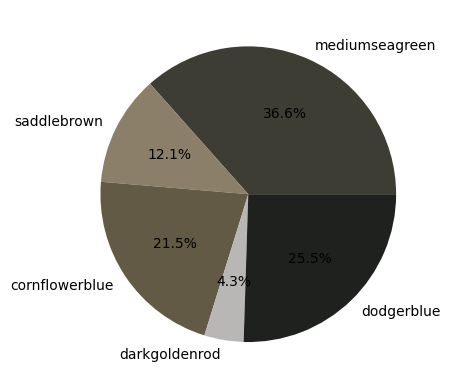

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


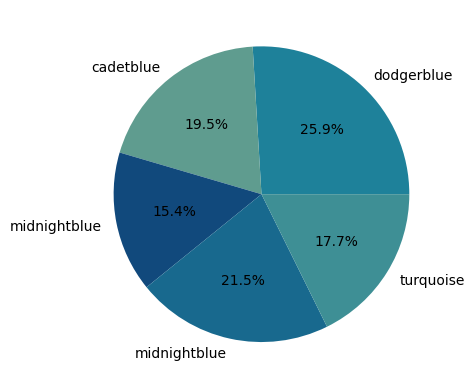

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


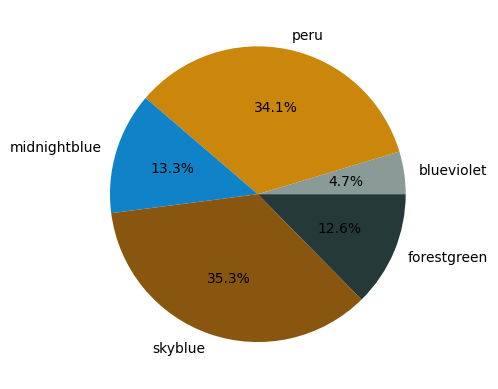

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import webcolors


def get_color_name(rgb_trip):
  min_colors = {}
  for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
    r, g, b = webcolors.hex_to_rgb(key)
    r_ = (r - rgb_trip[0]) ** 2
    g_ = (r - rgb_trip[0]) ** 2
    b_ = (r - rgb_trip[0]) ** 2
    min_colors[(r_ + g_ + b_)] = name
  return min_colors[min(min_colors.keys())]

img_pths = ['/content/test-img-1.jpg', '/content/test-img-2.jpeg', '/content/test-img-3.jpeg']
for img_pth in img_pths:
  img = cv2.imread(img_pth)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img = cv2.resize(img, (100, 100))

  pixels = img.reshape((-1, 3))

  kmeans = KMeans(n_clusters=5)
  kmeans.fit(pixels)
  colors = kmeans.cluster_centers_

  unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
  proportions = counts / sum(counts)

  color_names = [get_color_name(tuple(map(int, color))) for color in colors]
  plt.pie(proportions, colors=colors/255, labels=color_names, autopct="%1.1f%%")
  plt.show()